# [Kaggle_Diamonds Price Dataset](https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

## 1. EDA

In [2]:
df = pd.read_csv(os.getcwd() + '/data/diamonds/diamonds.csv')
display(df.head(3))
print(df.info())
print(df.shape)
print(df.isna().sum())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB
None
(50000, 10)
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


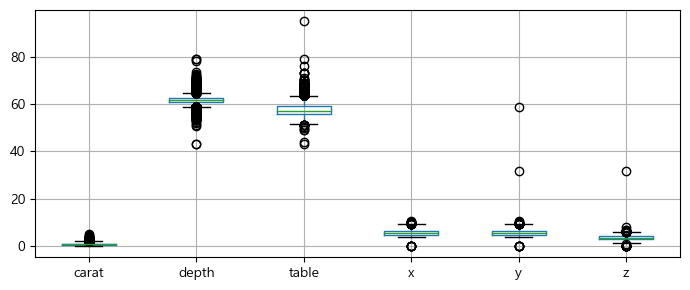

In [37]:
plt.figure(figsize=(7,3))
df.drop('price', axis=1).boxplot()
plt.tight_layout();

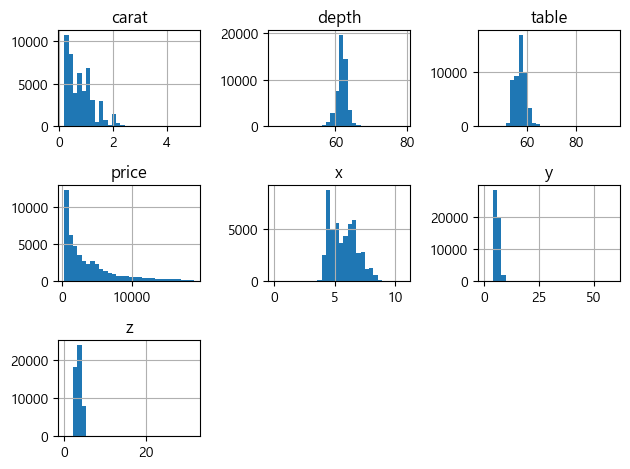

In [36]:
df.hist(bins=30)
plt.tight_layout();

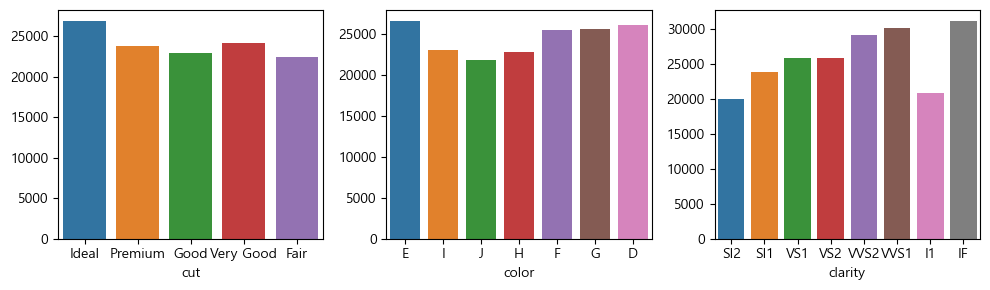

In [29]:
cate_cols = df.select_dtypes(include='object').columns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for i, feature in zip(range(3), cate_cols):
    col = i % 3
    sns.barplot(df[feature], df.index, ax=ax[col], ci=None)
plt.tight_layout();

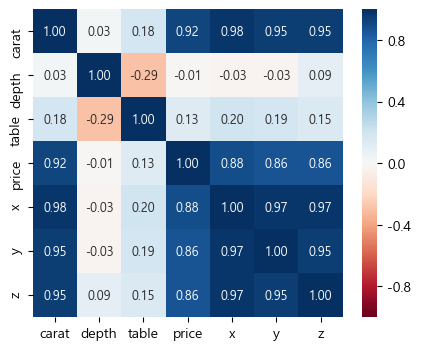

In [49]:
df_corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='RdBu', annot_kws={'fontsize': 9});

In [44]:
print('''
[해석]
1. 결측치 존재 여부
    - 전체 데이터에 결측치는 존재하지 않는다.
2. 데이터 타입
    - 종속변수 price는 int형이고, 독립변수는 object, int, float형으로 구성되었다.
3. 종속변수와 독립변수의 상관관계
    - 종속변수 price와의 상관계수를 확인했을 때, caret, x, y, z와 강한 양의 상관성을 보인다.
4. 독립변수 상관관계
    - 독립변수들 끼리의 상관관계를 확인한 결과, 다중공선성을 걱정할 만큼(0.9 이상) 강한 상관관계를 보이는 변수들이 있다.
    - caret과 x, y, z, 그리고 z, y, z 끼리의 관계가 그러하다.
5. 유의할 점
    - 독립변수에서 수치형 변수 간 값의 범위가 다르므로 스케일링을 통해 값의 범위를 통일시킬 필요가 있다.
    - 다중공선성 문제에 유의해야 한다.
''')


[해석]
1. 결측치 존재 여부
    - 전체 데이터에 결측치는 존재하지 않는다.
2. 데이터 타입
    - 종속변수 price는 int형이고, 독립변수는 object, int, float형으로 구성되었다.
3. 종속변수와 독립변수의 상관관계
    - 종속변수 price와의 상관계수를 확인했을 때, caret, x, y, z와 강한 양의 상관성을 보인다.
4. 독립변수 상관관계
    - 독립변수들 끼리의 상관관계를 확인한 결과, 다중공선성을 걱정할 만큼(0.9 이상) 강한 상관관계를 보이는 변수들이 있다.
    - caret과 x, y, z, 그리고 z, y, z 끼리의 관계가 그러하다.
5. 유의할 점
    - 독립변수에서 수치형 변수 간 값의 범위가 다르므로 스케일링을 통해 값의 범위를 통일시킬 필요가 있다.
    - 다중공선성 문제에 유의해야 한다.



## 2. 통계분석
### 1) 일원배치 분산분석
- 귀무가설: 색깔('E', 'I', 'J')에 따라 다이아몬드 가격에 차이가 없다.
- 대립가설: 색깔('E', 'I', 'J')에 따라 다이아몬드 가격에 차이가 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
E,I,2020.5071,-0.0,1856.0934,2184.9208,True
E,J,2258.5754,-0.0,2050.3205,2466.8303,True
I,J,238.0684,0.0361,12.0882,464.0485,True


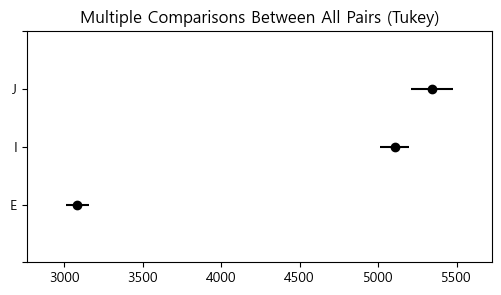

In [73]:
import scipy.stats as stats
e_color = df.loc[df['color']=='E', 'price']
i_color = df.loc[df['color']=='I', 'price']
j_color = df.loc[df['color']=='J', 'price']

# 정규성 검정 -> 모두 만족 못 함
stats.shapiro(e_color)
stats.shapiro(i_color)
stats.shapiro(j_color)

# 크루스칼 왈리스 검정
stats.kruskal(e_color, i_color, j_color) # 귀무가설 기각

# 사후검정
cond = (df['color']=='E') | (df['color']=='I') | (df['color']=='J')
samp_df = df.loc[cond][['color', 'price']]
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = samp_df['price'], groups=samp_df['color'])
tuekeyhsd = mc.tukeyhsd(alpha=.05)
fig = tuekeyhsd.plot_simultaneous(figsize=(6, 3))
tuekeyhsd.summary()

### 2) 이원배치 분산분석
1. 주효과 검정1
    - 귀무가설: 색깔('E', 'I', 'J')에 따라 다이아몬드 가격에 차이가 없다.
    - 대립가설: 색깔('E', 'I', 'J')에 따라 다이아몬드 가격에 차이가 있다.
1. 주효과 검정2
    - 귀무가설: 컷핑 품질('Idal', 'Good', 'Fair')에 따라 다이아몬드 가격에 차이가 없다.
    - 대립가설: 컷핑 품질('Idal', 'Good', 'Fair')에 따라 다이아몬드 가격에 차이가 있다.
1. 교호작용 검정
    - 귀무가설: 색깔과 컷핑 품질 간에 교호작용 효과가 없다.
    - 대립가설: 색깔과 컷핑 품질 간에 교호작용 효과가 있다.

In [84]:
e_color = df.loc[df['color']=='E', 'price']
i_color = df.loc[df['color']=='I', 'price']
j_color = df.loc[df['color']=='J', 'price']

ideal_cut = df.loc[df['cut']=='Ideal', 'price']
good_cut = df.loc[df['cut']=='Good', 'price']
fair_cut = df.loc[df['cut']=='Fair', 'price']

cond1 = (df['color']=='E') | (df['color']=='I') | (df['color']=='J')
cond2 = (df['cut']=='Good') | (df['cut']=='Ideal') | (df['cut']=='Fair')
samp_df2 = df.loc[cond1 & cond2][['cut', 'color', 'price']]

# 분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'price ~ C(color) + C(cut) + C(color):C(cut)'
model = ols(formula, samp_df2).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(color),7.288793e+09,2.0,263.135142,1.298667e-111
C(cut),6.079363e+08,2.0,21.947309,3.110874e-10
C(color):C(cut),2.970965e+08,4.0,5.362789,2.605743e-04
Residual,1.179596e+11,8517.0,NaN,NaN


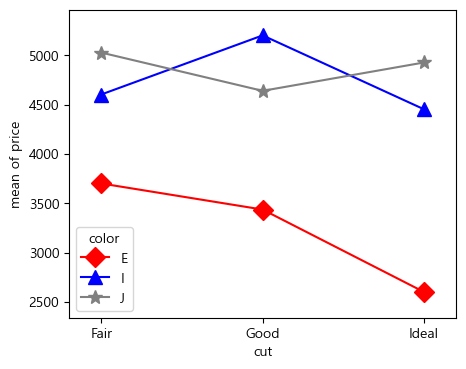

In [87]:
from statsmodels.graphics.factorplots import interaction_plot
cut = samp_df2['cut']
color = samp_df2['color']
price = samp_df2.price
fig, ax = plt.subplots(figsize=(5,4))
fig = interaction_plot(cut, color, price, colors=['red', 'blue', 'gray'], markers=['D', '^', '*'], ms=10, ax=ax)

### 3) 독립성 검정
- 귀무가설: 컷팅 품질과 투명도는 서로 독립이다.
- 대립가설: 컷팅 품질과 투명도는 서로 독립이 아니다.

In [94]:
tab = pd.crosstab(df['cut'], df['clarity'])
chi, p, dff, expect = stats.chi2_contingency(tab)
print('검정통계량: ', chi)
print('p-value: ', p) # 귀무가설 기각

검정통계량:  4095.0133742617845
p-value:  0.0


In [103]:
# 스피어만 상관분석
correlation_matrix, p_values = stats.spearmanr(tab)
print("Spearman Correlation Matrix:")
print(correlation_matrix)

print("\nP-values Matrix:")
print(p_values)

Spearman Correlation Matrix:
[[ 1.  -0.5 -0.2 -0.1 -0.2 -0.2 -0.5 -0.5]
 [-0.5  1.   0.9  0.7  0.9  0.9  1.   1. ]
 [-0.2  0.9  1.   0.9  1.   1.   0.9  0.9]
 [-0.1  0.7  0.9  1.   0.9  0.9  0.7  0.7]
 [-0.2  0.9  1.   0.9  1.   1.   0.9  0.9]
 [-0.2  0.9  1.   0.9  1.   1.   0.9  0.9]
 [-0.5  1.   0.9  0.7  0.9  0.9  1.   1. ]
 [-0.5  1.   0.9  0.7  0.9  0.9  1.   1. ]]

P-values Matrix:
[[1.40426542e-24 3.91002219e-01 7.47060078e-01 8.72888572e-01
  7.47060078e-01 7.47060078e-01 3.91002219e-01 3.91002219e-01]
 [3.91002219e-01 1.40426542e-24 3.73860735e-02 1.88120404e-01
  3.73860735e-02 3.73860735e-02 1.40426542e-24 1.40426542e-24]
 [7.47060078e-01 3.73860735e-02 1.40426542e-24 3.73860735e-02
  1.40426542e-24 1.40426542e-24 3.73860735e-02 3.73860735e-02]
 [8.72888572e-01 1.88120404e-01 3.73860735e-02 1.40426542e-24
  3.73860735e-02 3.73860735e-02 1.88120404e-01 1.88120404e-01]
 [7.47060078e-01 3.73860735e-02 1.40426542e-24 3.73860735e-02
  1.40426542e-24 1.40426542e-24 3.73860735e-02

### 4) 회귀분석

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
reg_df = pd.get_dummies(data=df, columns=['cut', 'color', 'clarity'], drop_first=True)
reg_df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [81]:
# 회귀분석을 위한 변수명 변경 formula 생성
reg_col = []
for col in reg_df.columns:
    if ' ' in col:
        reg_col.append(col.replace(' ', '_'))
    else: 
        reg_col.append(col)
        
reg_df.columns = reg_col
        
# 회귀분석을 위한 formula 생성
y_X = 'price ~ ' + ' + '.join(reg_col).replace('+ price ', '')
print(y_X)

# 회귀분석
model = smf.ols(formula=y_X, data=reg_df)
result = model.fit()
print()
print(result.summary())

price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.496e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:40:11   Log-Likelihood:            -4.2251e+05
No. Observations:               50000   AIC:                         8.451e+05
Df Residuals:                   49976   BIC:                         8.453e+05
Df Model:                          23                                         
Covariance Type:            nonrob

In [48]:
# 다중공선성 확인
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices(y_X, data=reg_df, return_type='dataframe')

# 독립변수끼리의 VIF 값을 계산하여 데이터프레임으로 만듦
vif_lst = []
for i in range(1, len(X.columns)):
    vif_lst.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_lst, columns=['vif', 'variable']).sort_values('vif', ascending=False).head(10)

,vif,variable
3,55.686440,x
5,22.879063,z
0,22.388005,carat
4,19.289243,y
17,14.754243,clarity_SI1
20,14.289550,clarity_VS2
18,11.454903,clarity_SI2
7,11.352133,cut_Ideal
19,10.771195,clarity_VS1
8,8.395071,cut_Premium


In [84]:
# vif 값이 높은 상위 10개 독립변수 제거
remove_col=pd.DataFrame(vif_lst, columns=['vif', 'variable']).sort_values('vif', ascending=False).head(10).variable.tolist()
print(remove_col)
reg_df2 = reg_df.drop(columns = remove_col, axis=1)

# 회귀분석을 위한 formula 생성
y_X_2 = 'price ~ ' + ' + '.join(reg_df2.columns).replace('+ price ', '')
print(y_X_2)

# 변수 제거후 회귀분석
model2 = smf.ols(formula=y_X_2, data=reg_df2)
result2 = model2.fit()
print()
print(result2.summary())

['x', 'z', 'carat', 'y', 'clarity_SI1', 'clarity_VS2', 'clarity_SI2', 'cut_Ideal', 'clarity_VS1', 'cut_Premium']
price ~ depth + table + cut_Good + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_VVS1 + clarity_VVS2

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:42:43   Log-Likelihood:            -4.8406e+05
No. Observations:               50000   AIC:                         9.682e+05
Df Residuals:                   49986   BIC:                         9.683e+05
Df Model:                          13                                         
Covariance Type:       

In [86]:
print('다중공선성 의심 변수를 제거한 회귀분석의 수정된 결정계수 값이 더 낮아졌다.')

다중공선성 의심 변수를 제거한 회귀분석의 수정된 결정계수 값이 더 낮아졌다.


## 3. 머신러닝

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
import time

# 원핫인코딩
df2=pd.get_dummies(data= df, columns=['cut', 'color', 'clarity'], drop_first=True)

# 데이터 분할
X = df2.drop('price', axis=1)
y = df2.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 모델 객체 생성
svr = SVR()
rfr_reg = RandomForestRegressor(random_state=123)
lasso=Lasso()
ridge = Ridge()

def model_train_test(model):
    start=time.time()
    model.fit(X_train_sc, y_train)
    end=time.time()
    y_pred = model.predict(X_test_sc)
    r2 = round(r2_score(y_pred, y_test), 4)
    rmse = round(np.sqrt(mean_squared_error(y_pred, y_test)), 4)
    print(f'<<{model.__class__.__name__}>>')
    print('R2 Score: ', r2)
    print('RMSE: ', rmse)
    print(f'time : {round(end-start, 4)}')

In [113]:
model_train_test(svr)
model_train_test(rfr_reg)
model_train_test(lasso)
model_train_test(ridge)

<<SVR>>
R2 Score:  -6.1835
RMSE:  3300.8039
time : 141.5914
<<RandomForestRegressor>>
R2 Score:  0.9767
RMSE:  599.0917
time : 28.2963
<<Lasso>>
R2 Score:  0.9152
RMSE:  1109.02
time : 0.3608
<<Ridge>>
R2 Score:  0.9122
RMSE:  1132.486
time : 0.011


---
#### 종속변수 price를 로그변환하여 다시 모델 구현

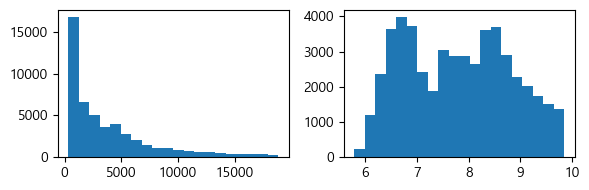

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,2))
ax[0].hist(df.price, bins=20)
ax[1].hist(np.log1p(df.price), bins=20)
plt.tight_layout();

In [143]:
# 로그변환 종속변수 추가
df2['log_price'] = np.log1p(df.price) 

# 데이터 분할
X = df2.drop(['price', 'log_price'], axis=1)
y = df2['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

def model_train_test_exp(model):
    start=time.time()
    model.fit(X_train_sc, y_train)
    end=time.time()
    y_pred = model.predict(X_test_sc)
    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(y_pred)
    r2 = round(r2_score(pred_exp, y_test_exp), 4)
    rmse = round(np.sqrt(mean_squared_error(pred_exp, y_test_exp)), 4)
    print(f'<<{model.__class__.__name__}>>')
    print('R2 Score: ', r2)
    print('RMSE: ', rmse)
    print(f'time : {round(end-start, 4)}')

In [144]:
model_train_test_exp(svr)
model_train_test_exp(rfr_reg)
model_train_test_exp(lasso)
model_train_test_exp(ridge)

<<SVR>>
R2 Score:  0.9768
RMSE:  590.9808
time : 83.2292
<<RandomForestRegressor>>
R2 Score:  0.9739
RMSE:  627.7803
time : 27.3628
<<Lasso>>
R2 Score:  0.0
RMSE:  4244.7009
time : 0.016
<<Ridge>>
R2 Score:  -0.0001
RMSE:  1.2612454245708687e+18
time : 0.01
